In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook



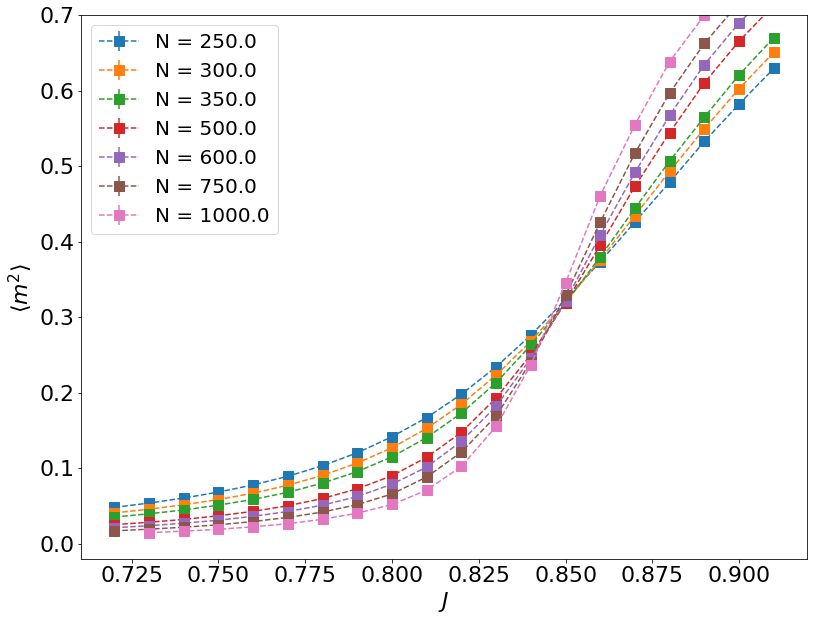

In [2]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<250):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = data_l[:,15]*J_l
    errs = data_l[:,16]*J_l
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)
 
#ax2 = ax.twiny() 
#ax2.set_xlabel(r'$x$', fontsize=22)
#ax2.set_xticks(np.arange(0,11,2)/10)
#ax2.tick_params(axis='x', labelsize=22)
#ax2.set_xbound(ax.get_xbound())
#ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/mag2.png")


plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/mag2.png")

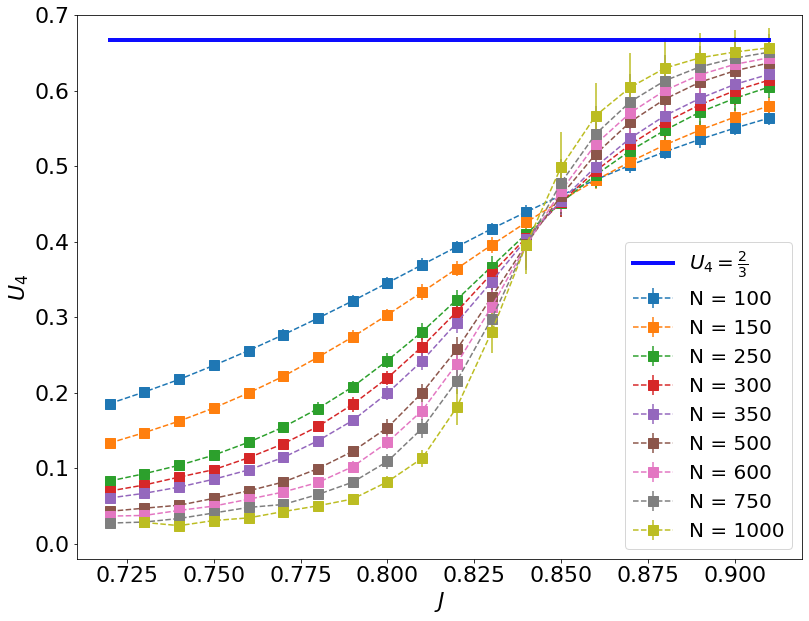

In [3]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-",  c="b",lw=4, label=r"$U_4=\frac{2}{3}$", alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)
 
#ax2 = ax.twiny() 
#ax2.set_xlabel(r'$x$', fontsize=22)
#ax2.set_xticks(np.arange(0,11,2)/10)
#ax2.tick_params(axis='x', labelsize=22)
#ax2.set_xbound(ax.get_xbound())
#ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeper.png")


plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/bcfar_canonical_deeper.png")

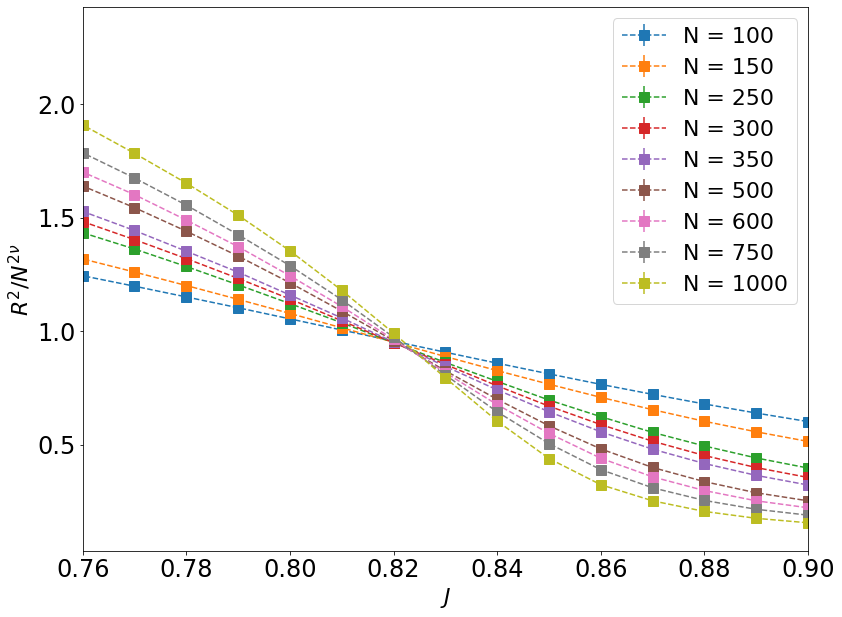

In [28]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
nu+=0.06
for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
plt.xlim(0.76, 0.9)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()

plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")

plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/rscaling.png")

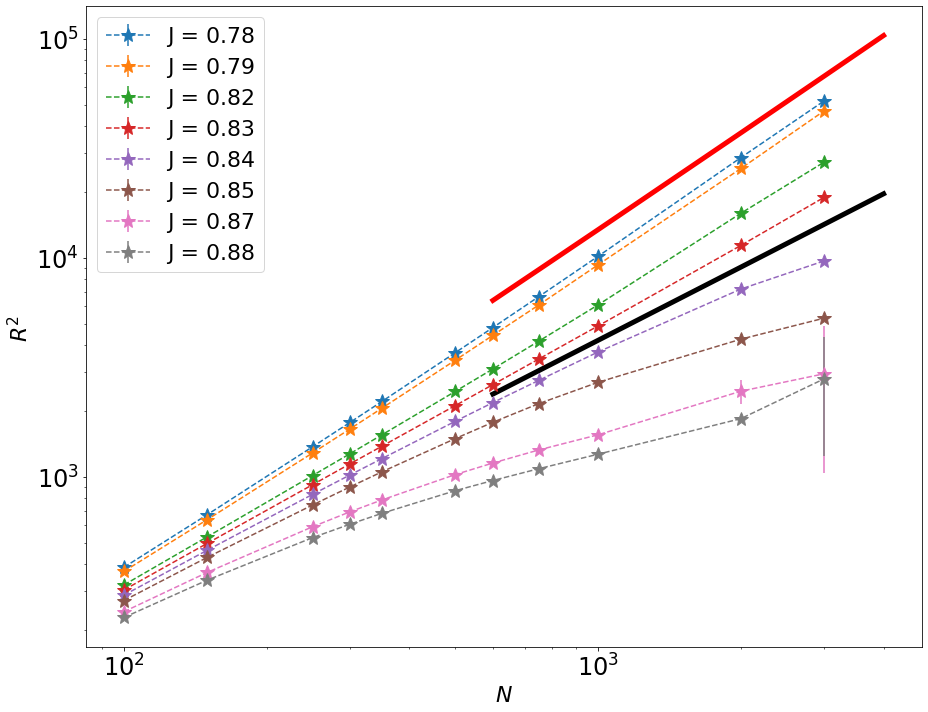

In [3]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=0) 
#data_np1 = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
data_np1 =np.loadtxt("Ising/Plots/Energy_Ising__.txt", skiprows=0) 
data_np1 = data_np1[:,:-6]
data_np = np.vstack((data_np, data_np1))
data_np= data_np[data_np[:,0]<5000]
data_np= data_np[data_np[:,0]>50]
#data_np= data_np[data_np[:,0]>99]
#data_np= data_np[data_np[:,1]>0.75]
#data_np= data_np[data_np[:,1]<0.88]


J_s = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

y= np.argsort(data_np[:, 0],kind='mergesort')
data_np=data_np[y]



J_s = [0.78, 0.79, 0.82, 0.83, 0.84, 0.85, 0.87, 0.88 ] 

for l in J_s:
    #if (l<100):
        #continue
        
    #if (l==0.83): continue
    #if (l==0.86): continue    
        
    data_l = data_np[data_np[:,1]==l]
    J_l = data_l[:, 0]
    r_l = data_l[:, 3]
    
    bc = r_l 
 
    errs = data_l[:, 4] 
   
    plt.errorbar(J_l, bc, yerr=errs, fmt="*--", ms = 15, label = "J = " + str((l)))

    
lengths = np.unique(data_np[:, 0])
lengths=lengths[lengths>500]
lengths=np.append(lengths, values=[4000])
b =  0.191878586
 
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
plt.plot(lengths, y, "-", c="k", lw=5)
 
    
    
b = -0.60715

nu=3/4
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
plt.plot(lengths, y, "-",c="r", lw=5)


b =  0.10878586
 
nu=1/2
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
#plt.plot(lengths, y, c="b")
    
plt.xlabel(r'$N$', fontsize = 22)
plt.ylabel(r"$ R^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
    
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()

plt.legend(fontsize=22)

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/r2log.png", bbox_inches='tight')

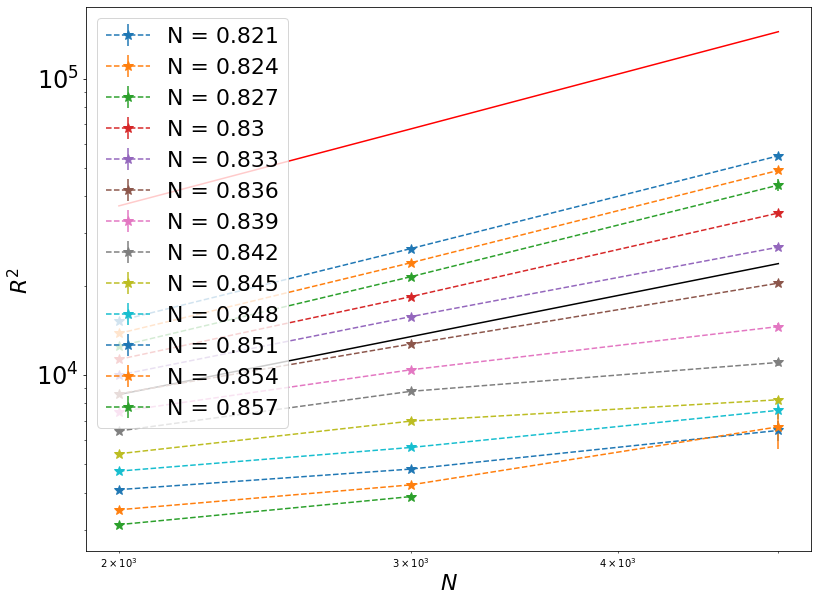

In [62]:


data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)

 
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
data_np= data_np[data_np[:,0]<6000]
#data_np= data_np[data_np[:,0]>99]
#data_np= data_np[data_np[:,1]>0.75]
#data_np= data_np[data_np[:,1]<0.88]

lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

y= np.argsort(data_np[:, 0],kind='mergesort')
data_np=data_np[y]

for l in lengths:
    #if (l<100):
        #continue
        
    #if (l==0.83): continue
    #if (l==0.86): continue    
        
    data_l = data_np[data_np[:,1]==l]
    J_l = data_l[:, 0]
    r_l = data_l[:, 3]
    
    bc = r_l 
 
    errs = data_l[:, 4] 
   
    plt.errorbar(J_l, bc, yerr=errs, fmt="*--", ms = 10, label = "N = " + str((l)))
 
b =  0.10878586
lengths = np.unique(data_np[:, 0])
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
plt.plot(lengths, y, "-", c="k")
 
    
    
b = -0.60715
lengths = np.unique(data_np[:, 0])
nu=3/4
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
plt.plot(lengths, y, "-",c="r")


b =  0.10878586
lengths = np.unique(data_np[:, 0])
nu=1/2
y = np.power(lengths+1, 2*nu)*(1+b)+lengths
#plt.plot(lengths, y, c="b")
    
plt.xlabel(r'$N$', fontsize = 22)
plt.ylabel(r"$ R^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
 
    
    
plt.yscale('log')
plt.xscale('log')


plt.legend(fontsize=22)

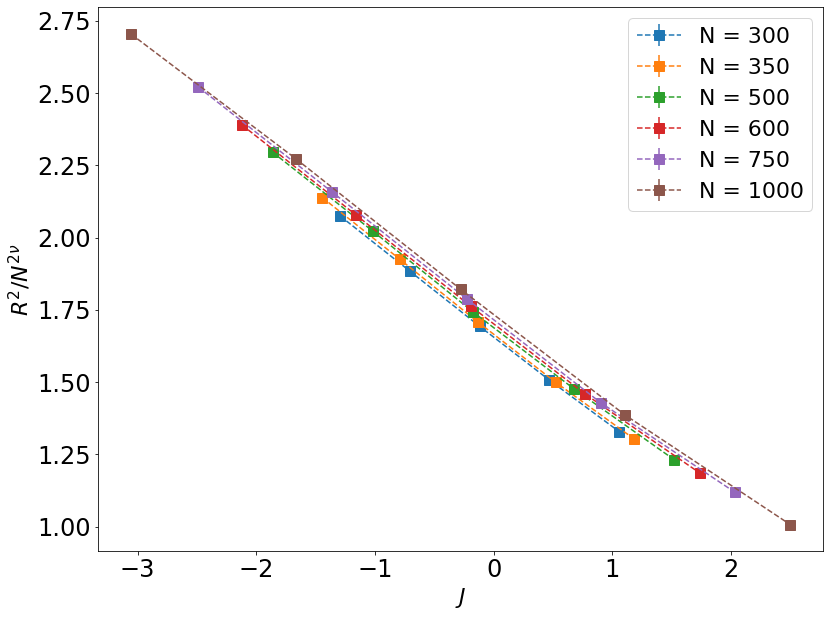

In [5]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
data_np=data_np[data_np[:,1]<0.86]
data_np=data_np[data_np[:,1]>0.8]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
phi = 5/7
J_theta = 0.832
for l in lengths:
    if (l<300):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = (data_l[:, 1]-J_theta)* (l**phi)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(0.76, 0.9)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()

plt.savefig("/home/kamilla/Lattice_models/img/rscaling_dc.png")

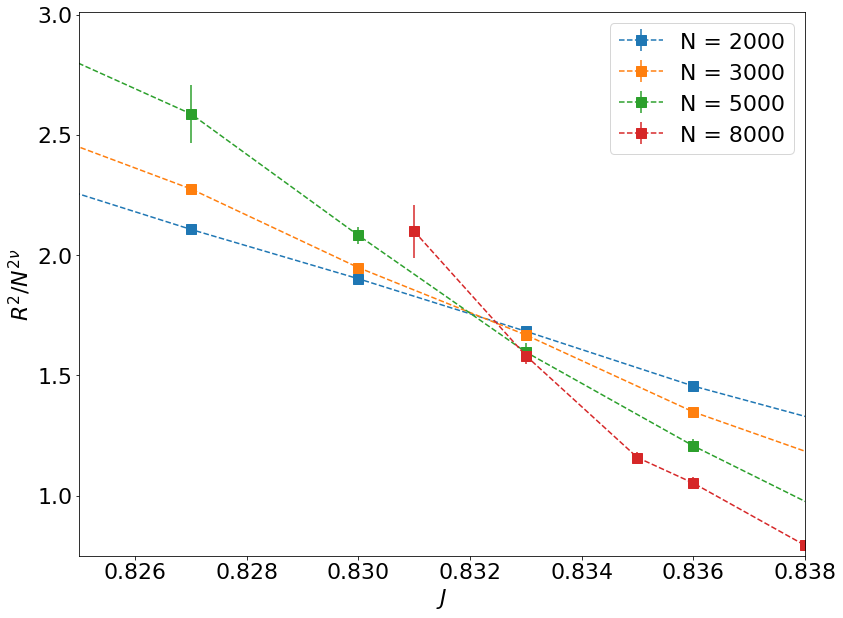

In [15]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)

 
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
for l in lengths:
    
    if (l>5000):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
  
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/ClusterUpdate/longnear2.txt")
l=8000
#data_np = np.loadtxt("Ising/Geometry_Results/long/Energy_Ising.txt", skiprows=0)
#data_np= np.loadtxt("Ising/Geometry_Results/long/Energy_Ising.txt", skiprows=0)
 
#l=8100
data_l = data_np[data_np[:,0]==l]   
r_l = data_l[:, 3]
rl_scale = r_l/np.power(l, 2*nu)
err = data_l[:, 4]/np.power(l, 2*nu)
plt.errorbar(data_l[:,1], rl_scale, yerr=err, fmt="s--", ms = 10, label = "N = " + str(l))
     
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.ylim(0.75, 3.01)
plt.xlim(0.825, 0.838)

plt.legend(fontsize=22)

#plt.grid()
 

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/r2_cross.png", bbox_inches='tight')
#plt.savefig("/home/kamilla/Lattice_models/img/rscalinglong.png")

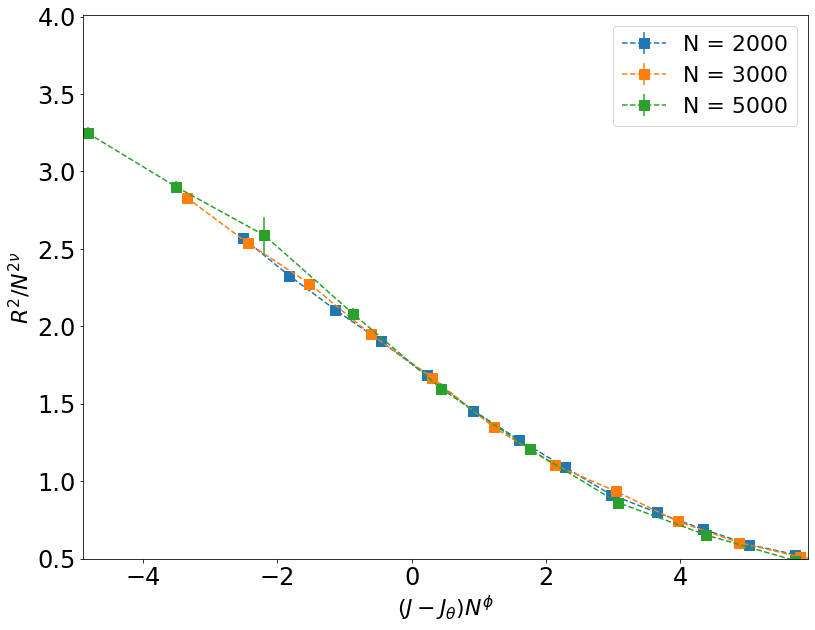

In [20]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
phi = 5.0/7
J_theta = 0.832
for l in lengths:
    
    if (l>5000):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = (data_l[:, 1]-J_theta)* (l**phi)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
  
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
#add N = 8000
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/ClusterUpdate/longnear2.txt")
l=4000
data_l = data_np[data_np[:,0]==l]   
r_l = data_l[:, 3]
rl_scale = r_l/np.power(l, 2*nu)
err = data_l[:, 4]/np.power(l, 2*nu)
#plt.errorbar(data_l[:,1], rl_scale, yerr=err, fmt="s--", ms = 10, label = "N = " + str(l))
     
plt.xlabel(r'$ (J-J_{\theta})  N ^{\phi} $', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

plt.ylim(0.5, 4.01)
#plt.xlim(-6, 6)
ax.set_xlim([-4.9, 5.9])
plt.legend(fontsize=22)

#plt.grid()

plt.savefig("/home/kamilla/Lattice_models/img/rscalinglong_dc.png")

In [21]:
def r_on_n(n, nu, b):
    return 2*nu*n+b

In [46]:

k1=1
k2=1
for J in [0.76] :
    data_l = data_np[data_np[:,1]==J]
    data_l = data_l[data_l[:,0]>99]
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    
popt, pcov    

(array([ 0.70898784, -0.50715294]),
 array([[ 1.65351805e-06, -1.54406345e-05],
        [-1.54406345e-05,  1.44333287e-04]]))

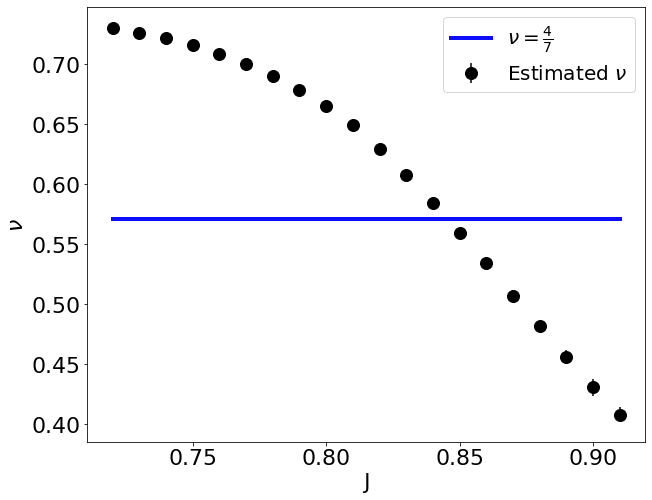

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    data_l = data_l[data_l[:,0]>99]
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    

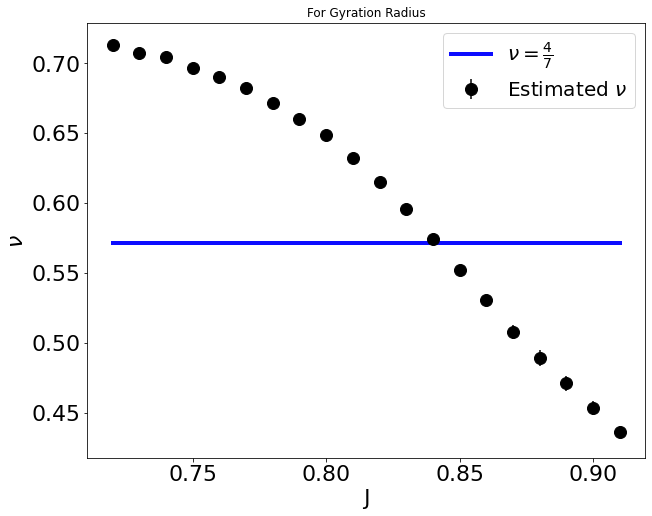

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,5]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)
plt.title("For Gyration Radius")
plt.legend(loc="best", fontsize=20)
    

[Text(0.0, 1, '1.0'),
 Text(0.2, 1, '1.2'),
 Text(0.4, 1, '1.5'),
 Text(0.6, 1, '1.8'),
 Text(0.8, 1, '2.2'),
 Text(1.0, 1, '2.7')]

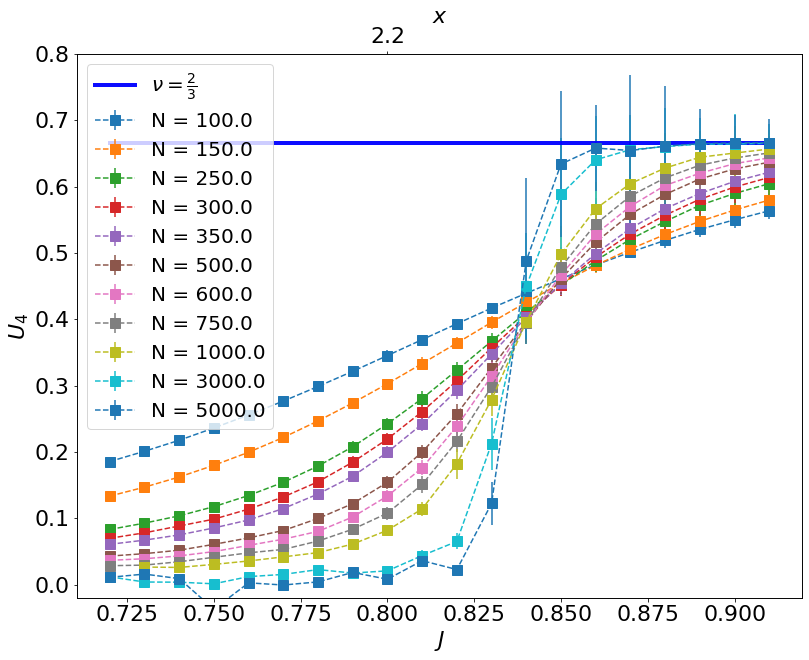

In [11]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
  
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )



In [12]:
def peak_heat(n, alphafc, a):
    return a*np.power(n, alphafc)
    #return a*np.log(-n)

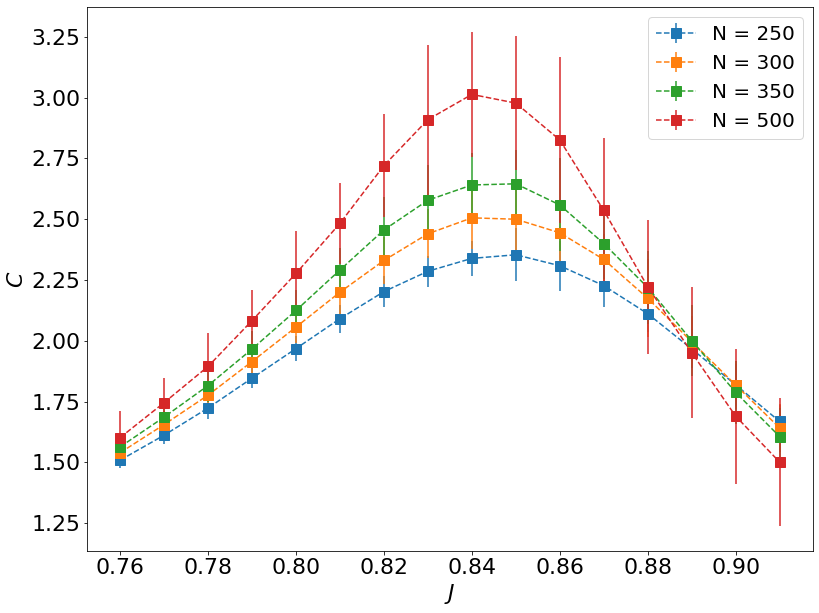

In [27]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
 
    
data_np = data_np[data_np[:,1]>0.75]
lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
for l in lengths:
    if (l<250):
        continue
        
    if (l>500):
        continue
     
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = []
    errs=[]
    
    for j in range(len(J_l)):
        e1 = norm.rvs(data_l[j, 7], data_l[j, 8], size = 1000)
        e2 = norm.rvs(data_l[j, 9], data_l[j, 10], size = 1000)
    
        cum = (e2 - e1*e1)*np.square(J_l[j])*l
        mean = np.mean(cum)
        
        err=np.std(cum)#/np.sqrt(len(cum))
        
        bc.append(mean)
        errs.append(err)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/heat.png")
    
#plt.savefig("/home/kamilla/Lattice_models/img/canonical_c.png")

## Не работает фиттирование 

In [14]:
def r_in_theta_point(N, epsb_theta, a, b,fi ):
    epsb = 0.84

    r_sq = a*np.power(N, 8.0/7.0) + b*np.power(N, fi) * (epsb-epsb_theta)
    #r_sq = a*np.power(N,  nu) + b*np.power(N, fi) * (epsb-epsb_theta)
    return r_sq

In [15]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
#fig = plt.figure(figsize=(13, 10))
#ax = fig.add_subplot(111)

data_l = data_np[data_np[:,1]==0.84]
data_l = data_l[data_l[:,0]> 99]
#data_l = data_l[data_l[:,0]<699]
n_saw = data_l[:, 0] #np.sqrt(data_l[:, 0])
mean_r = data_l[:,5]
err_r = data_l[:,6] 



In [16]:

#popt, pcov = curve_fit( r_in_theta_point, n_saw, mean_r, sigma=err_r, p0=[0.847, 1, 1, 11.0/7.0], absolute_sigma= False, maxfev=5000 )  


In [17]:
#print(popt[0], np.sqrt(np.diag(pcov))[0])
#print(popt[-1], np.sqrt(np.diag(pcov))[-1])
#print(popt[-2], np.sqrt(np.diag(pcov))[-1])
#theta = popt[0]
#print(theta)

Text(0.5, 1.0, '$\\langle R^2 \\rangle $')

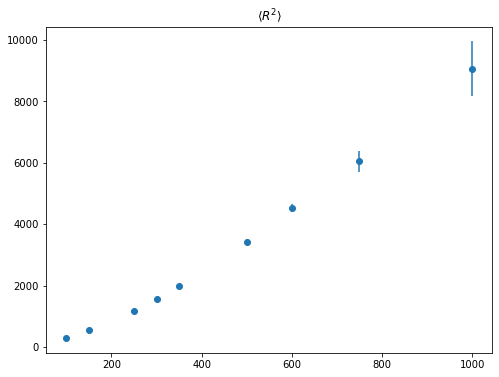

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

plt.errorbar(n_saw, mean_r, yerr=err_r, fmt = "o")

plt.title(r"$\langle R^2 \rangle $")

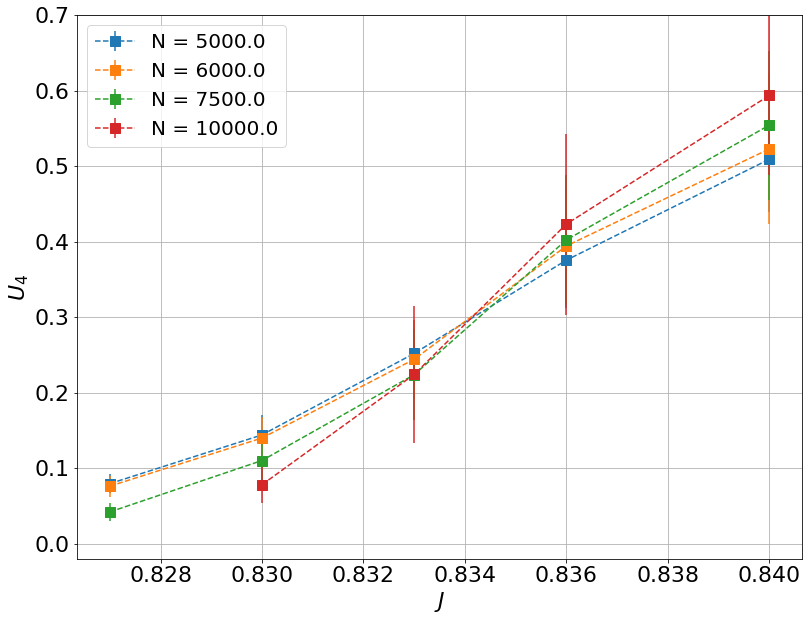

In [2]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<100):
        continue
        
    #if (l>5000):
        #continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)
#plt.xlim(0.82, 0.841)
plt.grid()

plt.legend(loc="best", fontsize=20)


#plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeperlong.png")

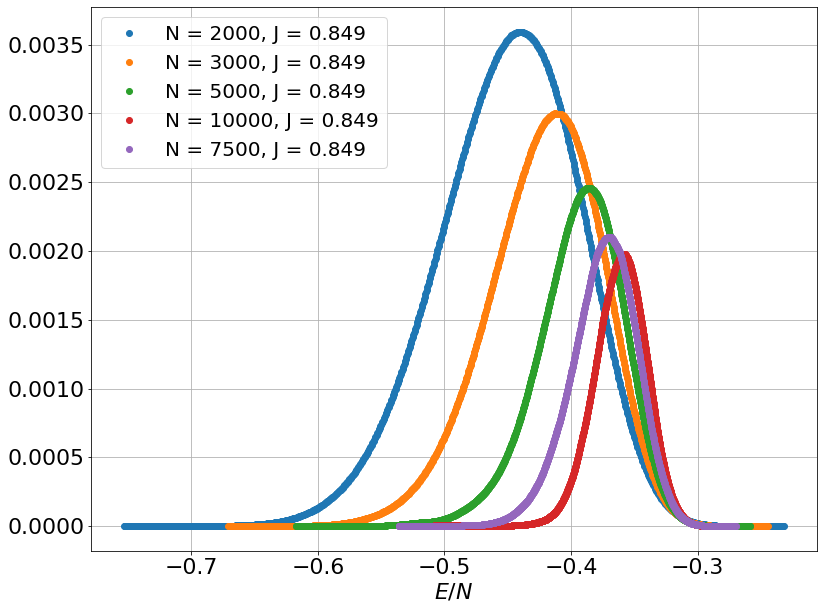

In [20]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.849")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.849")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.849")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.849")




data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.849")


plt.xlabel(r'$ E/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)

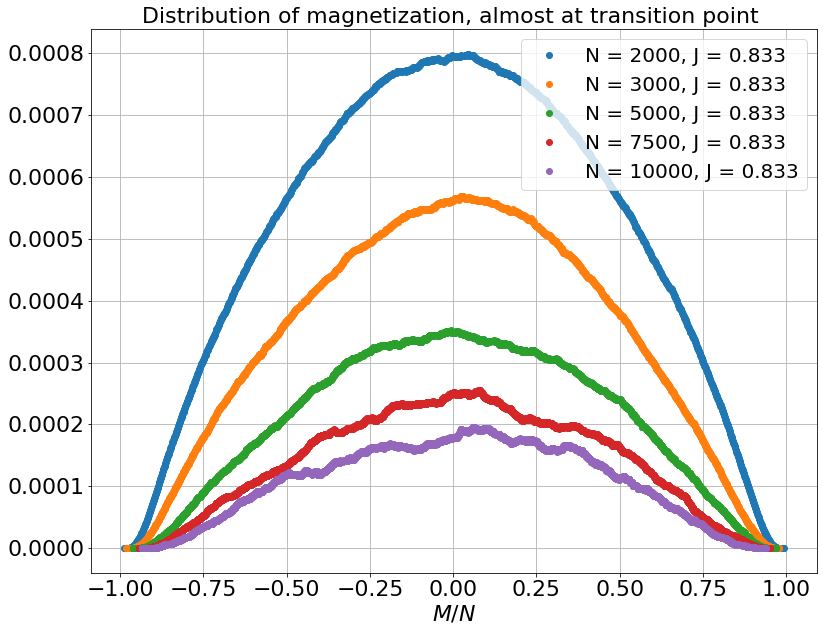

In [21]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.833")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.833")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.833")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.833")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.833")



plt.xlabel(r'$ M/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.title("Distribution of magnetization, almost at transition point ", fontsize=22)

plt.legend(loc="best", fontsize=20)

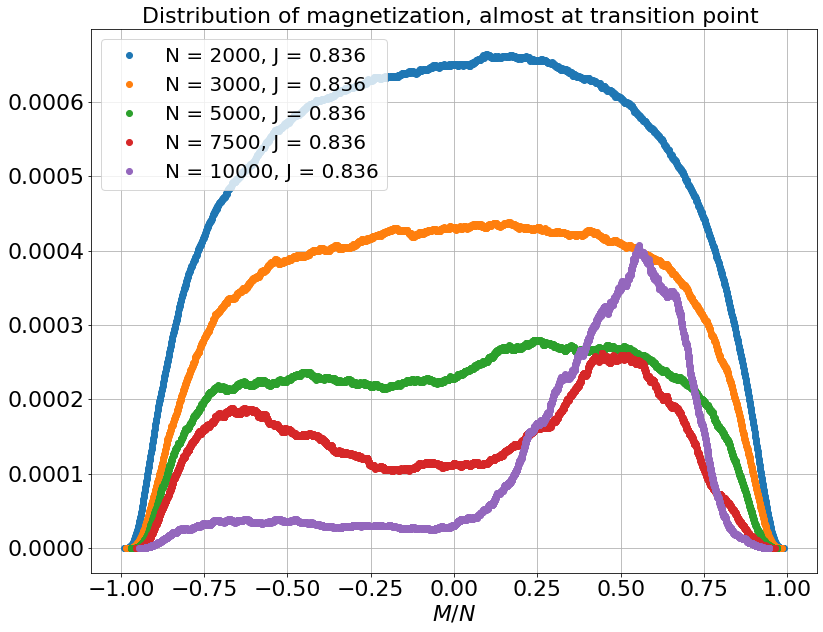

In [22]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.836")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.836")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.836")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.836")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.836")



plt.xlabel(r'$ M/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.title("Distribution of magnetization, almost at transition point ", fontsize=22)

plt.legend(loc="best", fontsize=20)

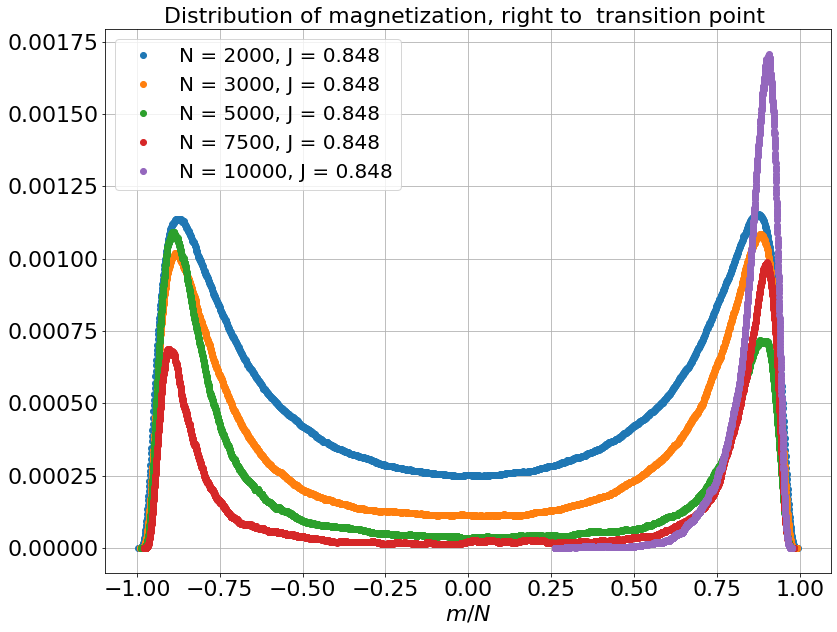

In [23]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.848")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.848")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.848")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.848")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.848")





plt.title("Distribution of magnetization, right to  transition point ", fontsize=22)

plt.xlabel(r'$ m/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)

#  N = 2000

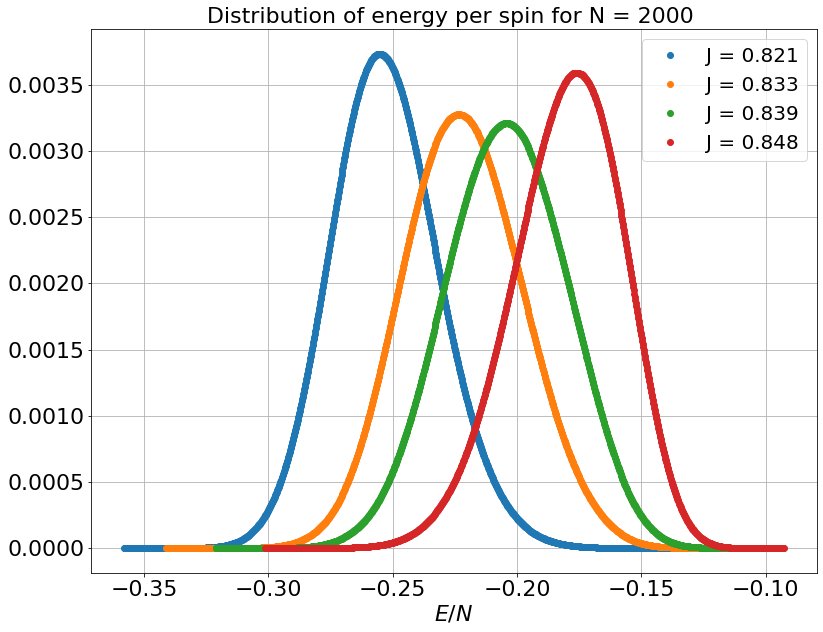

In [24]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.821000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.821")
 

data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.833000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.833")
 


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.839000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.839")
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.848")
 

 
plt.title("Distribution of energy per spin for N = 2000 ", fontsize=22)

plt.xlabel(r'$ E/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)


plt.savefig("/home/kamilla/Lattice_models/img/distrenergy2000.png")

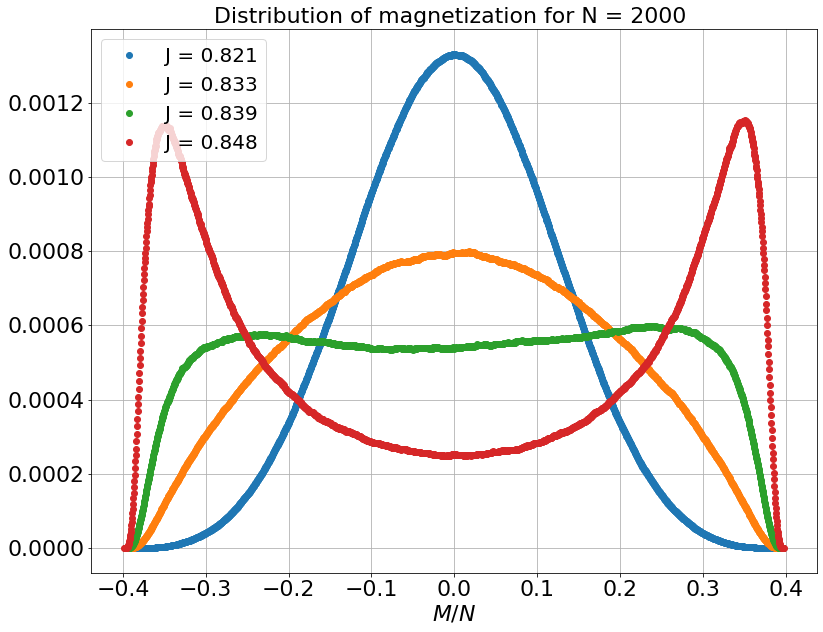

In [25]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.821000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.821")
 

data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.833")
 


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.839000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.839")
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.848")
 

 
plt.title("Distribution of magnetization for N = 2000 ", fontsize=22)

plt.xlabel(r'$ M/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/distrmag2000.png")
#plt.savefig("/home/kamilla/Lattice_models/img/distrmag2000.png")

# N = 10000

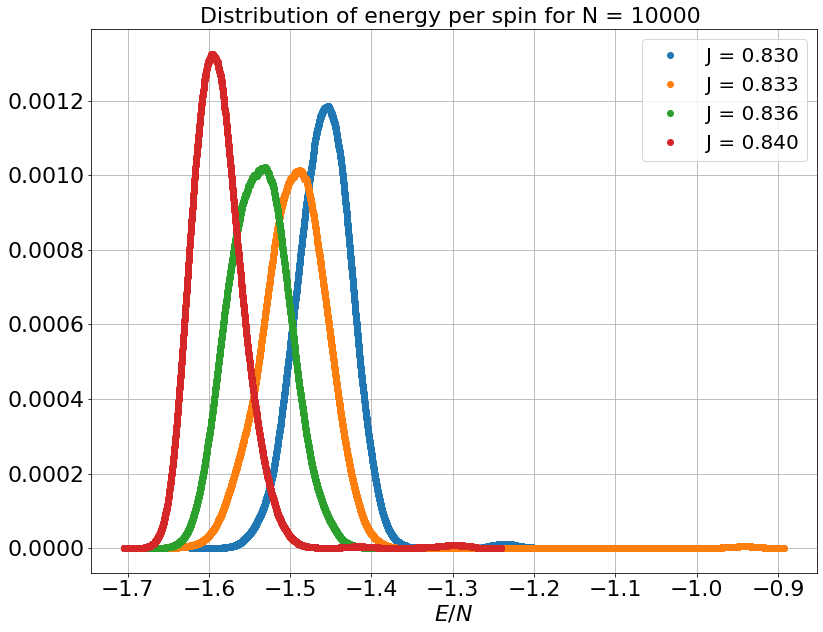

In [26]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Main/Counts_E_Ising_0.830000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.830")
 
    
data_np = np.loadtxt("Ising/Main/Counts_E_Ising_0.833000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.833")
 


data_np = np.loadtxt("Ising/Main/Counts_E_Ising_0.836000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.836")
 
    
data_np = np.loadtxt("Ising/Main/Counts_E_Ising_0.840000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.840")
 

 
plt.title("Distribution of energy per spin for N = 10000 ", fontsize=22)

plt.xlabel(r'$ E/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)


plt.savefig("/home/kamilla/Lattice_models/img/distrenergy10000.png")

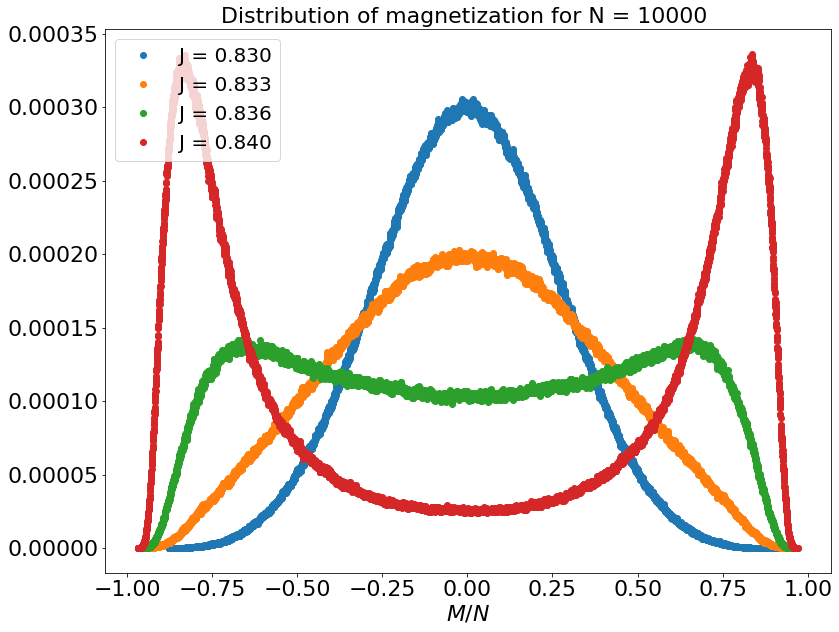

In [17]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Main/Counts_M_Ising_0.830000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.830")
 
    
data_np = np.loadtxt("Ising/Main/Counts_M_Ising_0.833000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.833")
 

data_np = np.loadtxt("Ising/Main/Counts_M_Ising_0.836000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.836")
 
    
data_np = np.loadtxt("Ising/Main/Counts_M_Ising_0.840000_10000_0.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.840")
 

 
plt.title("Distribution of magnetization for N = 10000 ", fontsize=22)

plt.xlabel(r'$ M/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.savefig("/home/kamilla/SAW_paper_KF_1/img/distrmag10000.png")
#plt.savefig("/home/kamilla/Lattice_models/img/distrmag10000.png")

[  10.   50.  100.  150.  250.  300.  350.  500.  600.  750. 1000.]
-0.026923076923076925


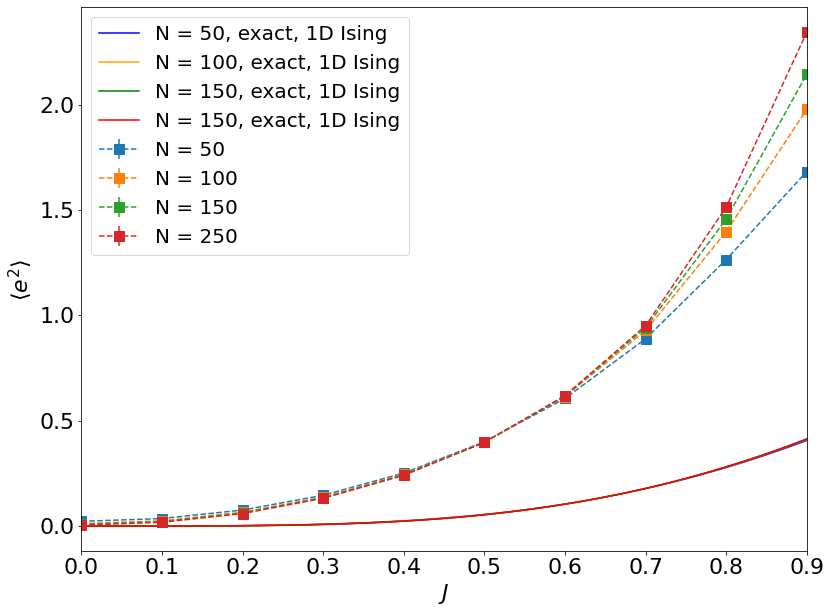

In [28]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)

data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)

#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
print(lengths)
Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)

lengths = [50, 100,150,250]
for l in lengths:
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l =  data_l[:,1] 
    
    m2 = data_l[:,9] 
 
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,10]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(np.min(J_l), np.max(J_l) )

filename = "Ising/MeanEnergy2-50.txt"
filedata = np.loadtxt(filename)
l=0  
plt.plot(filedata[:,0], filedata[:,1]/50/50  , c="blue",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
     
    
filename = "Ising/MeanEnergy2-100.txt"
filedata = np.loadtxt(filename)
l=1 
plt.plot(filedata[:,0], filedata[:,1]/100/100  , c="orange",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
   
filename = "Ising/MeanEnergy2-150.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]/150/150  , c="green",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
  

filename = "Ising/MeanEnergy2-250.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]/250/250  , c="red",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
   
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

[  10.   50.  100.  150.  250.  300.  350.  500.  600.  750. 1000.]
-0.026923076923076925


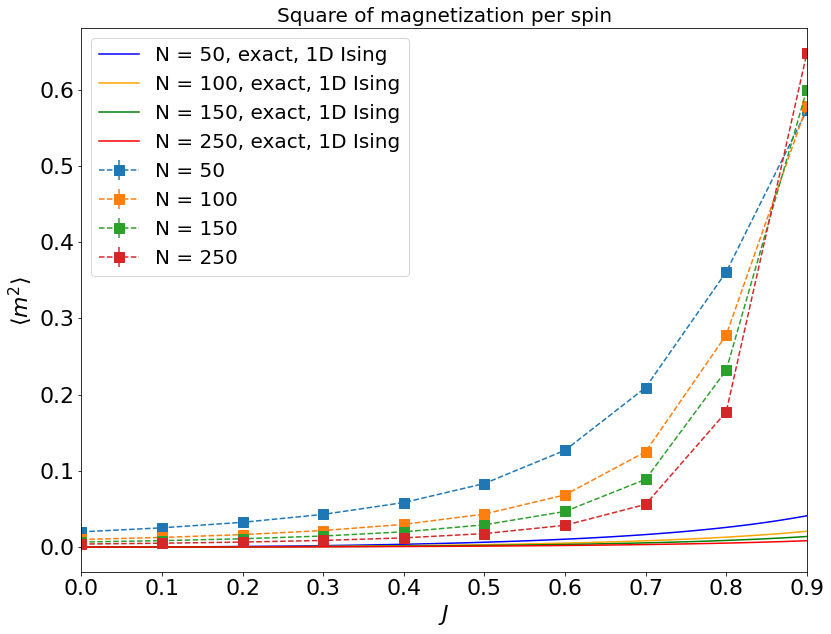

In [29]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)


#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
print(lengths)
Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)

lengths = [50, 100,150,250]
for l in lengths:
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l =  data_l[:,1] 
    
    m2 = data_l[:,15] 
 
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]

    #plt.plot(y*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(np.min(J_l), np.max(J_l) )

filename = "Ising/SrNam2-50.txt"
filedata = np.loadtxt(filename)
l=0  
plt.plot(filedata[:,0], filedata[:,1]/50/50  , c="blue",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
     
    
filename = "Ising/SrNam2-100.txt"
filedata = np.loadtxt(filename)
l=1 
plt.plot(filedata[:,0], filedata[:,1]/100/100  , c="orange",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
   
filename = "Ising/SrNam2-150.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]/150/150  , c="green",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
  

filename = "Ising/SrNam2-250.txt"
filedata = np.loadtxt(filename)
l=3
plt.plot(filedata[:,0], filedata[:,1]/250/250  , c="red",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
   
plt.title("Square of magnetization per spin", fontsize=20)
#plt.axvline(x=0, c="k" )
#plt.yscale('log')
plt.legend(loc="best", fontsize=20)
 

[  10.   50.  100.  150.  250.  300.  350.  500.  600.  750. 1000.]
-0.026923076923076925


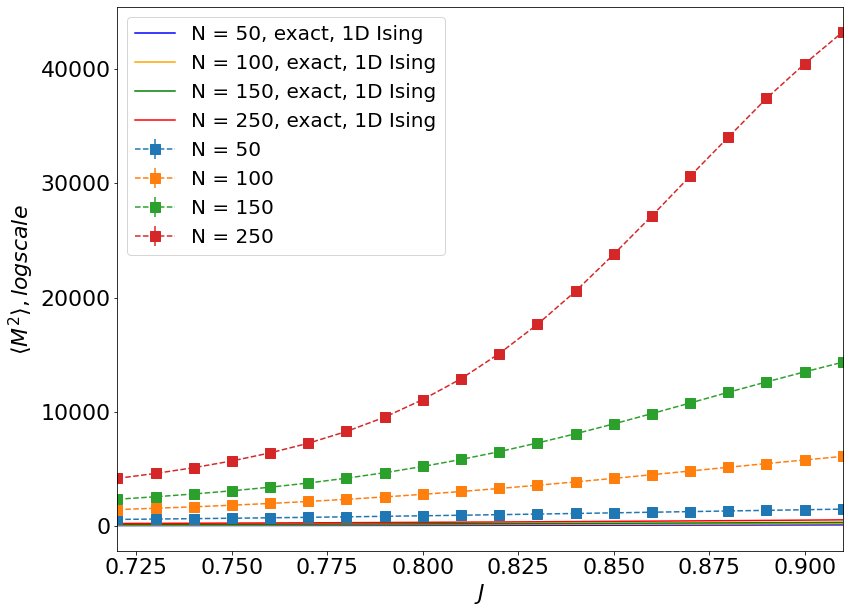

In [30]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
print(lengths)
Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)

lengths = [50, 100,150,250]
for l in lengths:
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l =  data_l[:,1] 
    
    m2 = data_l[:,15] 
 
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*l*l
    
    
    errs = data_l[:,10]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle M^2 \rangle, logscale $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(np.min(J_l), np.max(J_l) )

filename = "Ising/SrNam2-50.txt"
filedata = np.loadtxt(filename)
l=0  
plt.plot(filedata[:,0], filedata[:,1]  , c="blue",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
     
    
filename = "Ising/SrNam2-100.txt"
filedata = np.loadtxt(filename)
l=1 
plt.plot(filedata[:,0], filedata[:,1]  , c="orange",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
   
filename = "Ising/SrNam2-150.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]  , c="green",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
  

filename = "Ising/SrNam2-250.txt"
filedata = np.loadtxt(filename)
l=3
plt.plot(filedata[:,0], filedata[:,1]  , c="red",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
   

#plt.axvline(x=0, c="k" )
#plt.yscale('log')
plt.legend(loc="best", fontsize=20)

In [37]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

J = 0.83 


data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]
   
heat_data = (data_83[:,9] - data_83[:,7]*data_83[:,7])*data_83[:,1]*data_83[:,1]*data_83[:,0]
 
    
errs =  data_83[:,10]*data_83[:,10] + 4*data_83[:,8]*data_83[:,8]*data_83[:,7]*data_83[:,7]
errs = np.sqrt(errs)


popt, pcov = curve_fit(peak_heat, ns, heat_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([0.35075732, 0.3299115 ])

In [38]:
heat_data

array([3.72909554, 2.2867401 , 2.44076276, 2.57620361, 2.92692447,
       3.10203668, 3.3522386 ])

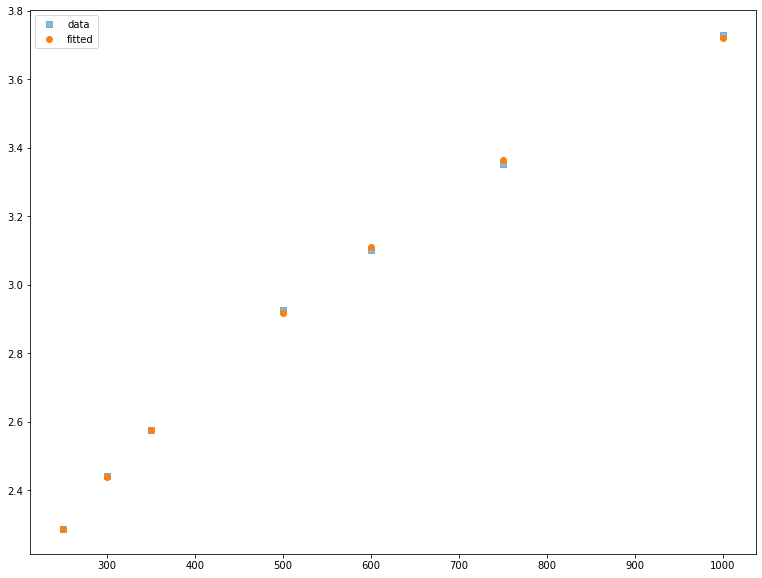

In [39]:
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.plot(ns, heat_data, "s", alpha = 0.5, label = "data")


plt.plot(ns, peak_heat(ns, popt[0], popt[1] ), "o", label = "fitted")


plt.legend()

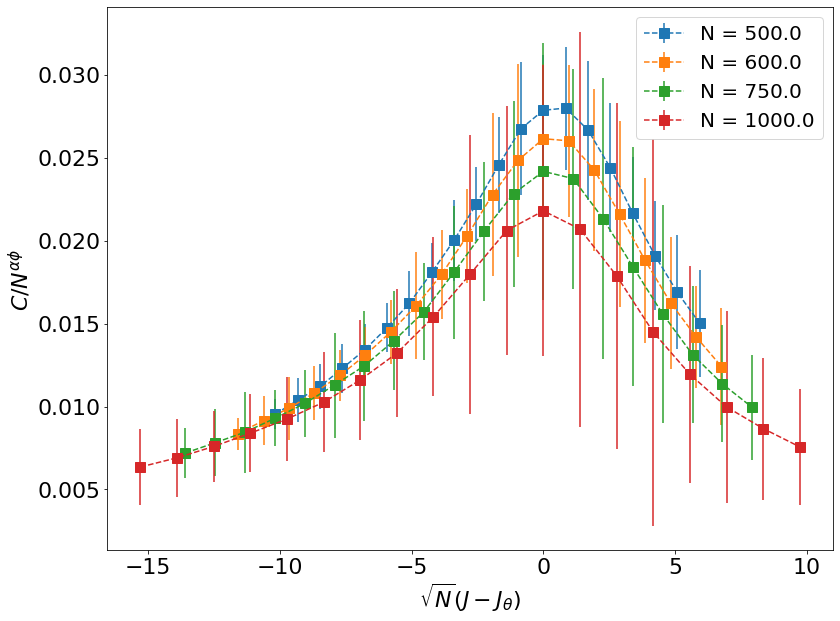

In [47]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
Tc = 0.84

 
nu=1

 
alpha = -1/3 
fc = 3/7
power = alpha*fc
 

power = -popt[0]
 
#power = 3/7
nu = 2
for l in lengths:
    
    if (l<450):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    L = np.power(l, 5/7)
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*J_l*J_l*data_l[:,1]
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = np.sqrt(errs)*np.power(L, power)*data_l[:,1]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*L, y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{  \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)

#plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")

In [63]:
def peak_heat(n, alphafc, a ):
    return a*np.power(n, alphafc)
    #return a*np.log(-n)

In [65]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)


lengths = np.unique(data_np[:, 0])

J = 0.83


data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]
   
heat_data = (data_83[:,9] - data_83[:,7]*data_83[:,7])*l*J*J
 
    
errs =  data_83[:,10]*data_83[:,10] + 4*data_83[:,8]*data_83[:,8]*data_83[:,7]*data_83[:,7]
errs = np.sqrt(errs)


popt, pcov = curve_fit(peak_heat, ns, heat_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([ -0.64805851, 327.6734821 ])

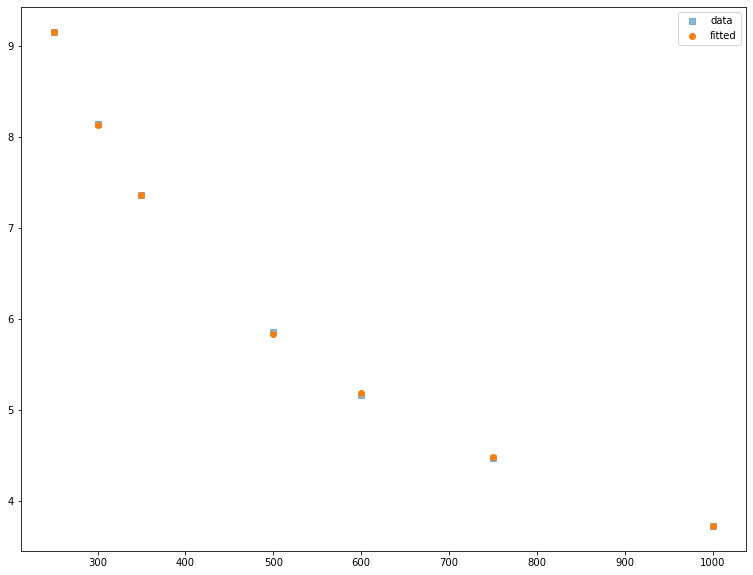

In [66]:
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.plot(ns, heat_data, "s", alpha = 0.5, label = "data")


plt.plot(ns, peak_heat(ns, popt[0], popt[1] ), "o", label = "fitted")


plt.legend()